
<a href="https://qworld.net" target="_blank" align="left"><img src="../qworld/images/header.jpg"  align="left"></a>
<table  align="left" width="100%"> <tr>
        <td  align="right" style="background-color:#ffffff;vertical-align:bottom;horizontal-align:right">
            prepared by Özlem Salehi (<a href="http://qworld.lu.lv/index.php/qturkey/" target="_blank">QTurkey</a>)
        </td>        
</tr></table>

<table width="100%"><tr><td style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;text-align:right;">This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros. </td></tr></table>
$\newcommand{\Mod}[1]{\ (\mathrm{mod}\ #1)}$
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $

<h1> <font color="blue"> Solutions for </font> Shor's Algorithm</h1>

<a id="task1"></a>
### Task 1

Let $N=111$. What percentage of the elements that are less than $N$ are relatively prime with $N$? Write a Python code to find out. (You can use gcd function of numpy.)

<h3>Solution</h3>

In [2]:
import numpy as np  

#Create an empty list
rlist=[]
N=111

#If relatively prime with N, append to the list
for i in range(1,N):
    if np.gcd(N,i)==1:
        rlist.append(i)
        
print(rlist)
        
print(len(rlist)*100/N, "percentage of the integers are relatively prime with", N)

[1, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19, 20, 22, 23, 25, 26, 28, 29, 31, 32, 34, 35, 38, 40, 41, 43, 44, 46, 47, 49, 50, 52, 53, 55, 56, 58, 59, 61, 62, 64, 65, 67, 68, 70, 71, 73, 76, 77, 79, 80, 82, 83, 85, 86, 88, 89, 91, 92, 94, 95, 97, 98, 100, 101, 103, 104, 106, 107, 109, 110]
64.86486486486487 percentage of the integers are relatively prime with 111


<a id="task2"></a>
### Task 2

Calculate the order of each element $ x $ that is relatively prime with $N $. What percentage of the $ x $’s have even order and satisfy $x^{r/2} \neq -1 \Mod{N}$?

Put the elements that satisfy the conditions in a dictionary together with their order.



<h3>Solution</h3>

In [3]:
import numpy as np
counter=0
#This will hold the list of integers that satisfy the conditions together with the order
satisfy={}

#rlist contains the relatively prime numbers with N        
for i in range(len(rlist)):
    r=1;
    while(1):
        if (rlist[i]**r)%N==1:
            if(r%2==0 and ((rlist[i]**int(r/2))%N != N-1)):
                counter=counter+1
                print("Order of",rlist[i],":",r)
                satisfy[rlist[i]]=r
            break
        r=r+1
    
print(counter*100/N, "percentage of the integers satisfy the conditions")        
        

Order of 2 : 36
Order of 4 : 18
Order of 5 : 36
Order of 8 : 12
Order of 13 : 36
Order of 14 : 12
Order of 17 : 36
Order of 19 : 36
Order of 20 : 36
Order of 22 : 36
Order of 23 : 12
Order of 25 : 18
Order of 26 : 6
Order of 28 : 18
Order of 29 : 12
Order of 31 : 4
Order of 32 : 36
Order of 35 : 36
Order of 38 : 2
Order of 40 : 18
Order of 43 : 4
Order of 44 : 18
Order of 47 : 6
Order of 50 : 36
Order of 52 : 36
Order of 53 : 18
Order of 55 : 36
Order of 56 : 36
Order of 58 : 18
Order of 59 : 36
Order of 61 : 36
Order of 64 : 6
Order of 67 : 18
Order of 68 : 4
Order of 71 : 18
Order of 73 : 2
Order of 76 : 36
Order of 79 : 36
Order of 80 : 4
Order of 82 : 12
Order of 83 : 18
Order of 85 : 6
Order of 86 : 18
Order of 88 : 12
Order of 89 : 36
Order of 91 : 36
Order of 92 : 36
Order of 94 : 36
Order of 97 : 12
Order of 98 : 36
Order of 103 : 12
Order of 106 : 36
Order of 107 : 18
Order of 109 : 36
48.648648648648646 percentage of the integers satisfy the conditions


<a id="task3"></a>
<h3>Task 3</h3>

Pick randomly one of the $x$ you found in Task 2 and calculate gcd$(x^{r/2}-1,N)$ and gcd$(x^{r/2}+1,N)$.

<h3>Solution</h3>

In [4]:
import random

#Pick a random integer
rand_index=random.randint(0,len(satisfy))

#Pick a random x and its order from the dictionary we have created above
x,r=random.choice(list(satisfy.items()))
print(x, "is picked with order", r)

#Calculate gcd
print("Factors of",N,":",np.gcd((x**int(r/2)-1),N), "and",np.gcd((x**int(r/2)+1),N))

8 is picked with order 12
Factors of 111 : 3 and 37


<a id="task4"></a>
<h3>Task 4</h3>

Factor 21 using Shor's Algorithm.

- Pick a random $x$ which is relatively prime with 21.
- Apply phase estimation circuit to the operator $U_x$.
- Use continued fractions algorithm to find out $r$.
- Compute $gcd(x^{r/2} -1, N)$ and $gcd(x^{r/2}+1, N)$

<h3>Solution</h3>

In [18]:
N=21

In [34]:
#Pick a random x relatively prime with N

import random as rand
import numpy as np

counter = 0

while(True):
    x = rand.randrange(1,N)
    counter = counter + 1
    if np.gcd(x,N)==1:
        break
        
print(x, " is picked after ", counter, " trials")    

10  is picked after  1  trials


In [35]:
#Run this cell to load the function Ux
%run ux_operator.py

In [36]:
#Create U operator by calling function Ux(x,N)
U=Ux(x,N)

In [37]:
# %load qpe.py
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.circuit.library import UnitaryGate

def qpe(t,control, target, circuit, U):

    #Apply Hadamard to control qubits
    for qb in control:
        circuit.h(qb)

    # raise U on the appropriate power
    for i in range(t):
        # Assemble list of control and target qubits
        qubits=[control[t-i-1]]
        for qq in target:
            qubits.append(qq)

        # Apply CU gates
        circuit.append(UnitaryGate(U).control(),qubits)

        # Increase the power of U for next iteration
        U=Operator(UnitaryGate(U.dot(U)))

    #Apply inverse QFT
    iqft(t,control,circuit)


In [38]:
# %load iqft.py
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator
from math import pi

def iqft(n, qubits, circuit):
    #Swap the qubits
    for i in range(n//2):
        circuit.swap(qubits[i],qubits[n-i-1])     

    #For each qubit
    for i in range(n-1,-1,-1):
        #Apply CR_k gates where j is the control and i is the target
        k=n-i #We start with k=n-i
        for j in range(n-1,i,-1):
            #Apply CR_k gate  
            circuit.cp(-pi*2/2**(k), qubits[j],qubits[i])
            k=k-1 #Decrement k at each step

        #Apply Hadamard to the qubit
        circuit.h(qubits[i])


In [39]:
#Determine t and n, size of the control and target registers
import math
n=math.ceil(math.log2(21))
t = 2*n+1+math.ceil(math.log2(2+1/(2*0.1)))
print("n=",n)
print("t=",t)
print("total qubits:",t+n)

n= 5
t= 14
total qubits: 19


In [40]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

#Create t qubits of the control register
control = QuantumRegister(t)

#Create n qubits of the target register
target = QuantumRegister(n)

#Create classical register to measure control qubits
measurement = ClassicalRegister(t)

#Create cirucit
qc4=QuantumCircuit(control, target, measurement) 

#Set target qubit to state |1>
qc4.x(target[n-1])

#Apply QPE
qpe(t,control, target, qc4, U)

# Measure control qubits
qc4.measure(control, measurement)

# Reverse control (and every other) qubits
qc4=qc4.reverse_bits()


Running job
{2731: 1}


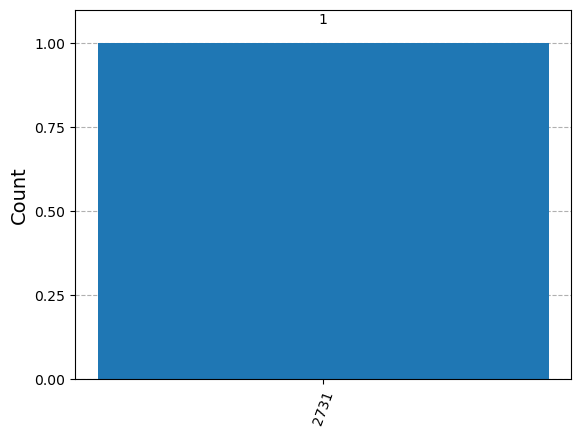

In [42]:
#Call the simulator and print the result
print("Running job")
qc4 = transpile(qc4, AerSimulator())
backend = AerSimulator(max_parallel_threads=8, max_parallel_experiments=1, max_parallel_shots=8)
result = backend.run(qc4, shots=1).result()

raw_counts = result.get_counts()

# Print a histogram of results
counts=dict((int(key,2), value) for (key, value) in raw_counts.items())
print(counts)            
display(plot_histogram(counts))

2731 is the outcome.

In [44]:
#Load the contFrac and convergents functions
%run ../include/helpers.py

#Run continued fractions algorithm to find out r
b = 2731
cf=contFrac(b/(2**t))
print(cf)
cv=convergents(cf)
print(cv)

[0, 5, 1, 1364, 2]
[Fraction(0, 1), Fraction(1, 5), Fraction(1, 6), Fraction(1365, 8189), Fraction(1366, 8195)]


The candidate is $s'=1$ and $r'=6$.

In [45]:
#Check if r is even, and x^{r/2} is not equal to -1 Mod N
r=6
if (r%2==0 and (x**(r/2))%N != -1) :
    print("Proceed")
else:
    print("Repeat the algorithm")

Proceed


Note that you may not be able to get the $r$ value in your first trial. In such a case, you need to repeat the algorithm. 

 Now let's check $gcd(x^{r/2} -1, N)$ and $gcd(x^{r/2}+1, N)$.

In [46]:
#Compute gcd to find out the factors of N

print("Factors of",N,":",np.gcd((x**int(r/2)-1),N), "and", np.gcd((x**int(r/2)+1),N))

Factors of 21 : 3 and 7


We are able to identify both of the factors of 21 which are 3 and 7. 